차원 축소 수정(UMAP)

라이브러리

In [1]:
from inspect import EndOfBlock
from os import name, sep
import matplotlib
from nltk import tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from umap import UMAP
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

파일 불러오기 ~ tf-idf

In [2]:
df = pd.read_csv("C:/Users/User/OneDrive - 공주대학교/바탕 화면/review/맞춤법 정리(리뷰, 레이블).csv", encoding='cp949')

train_x = df['리뷰']


okt = Okt()
print(train_x[4])
print(okt.morphs(train_x[4]))

#tf-idf
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=5, max_df=0.9, tokenizer=okt.morphs, token_pattern=None)
tfidf.fit(train_x.values.astype('U'))
train_x_okt = tfidf.transform(train_x.values.astype('U'))
vector = tfidf.transform(train_x.values.astype('U')).toarray()

순두부찌개는 너무 짠맛만 나고.. 물 넣어서 전자레인지 돌려먹었어요 그냥 딱 쉰 김치 국물에 순두부에요 제육덮밥도.. 제가 리뷰만 너무 믿었나요 윤기 1도 없고 그냥 퍽퍽 그 자체에요 반찬도 참다 참다 쉰내가 너무 나서 말씀드렸더니 쉰 김치냄새 때문에 그렇다 먹어도 이상 없다 하시는데 제가 거기서 더 이상 뭔 얘길 하나요~ 진심 두 입씩 먹고 다 안 먹었습니다 .. 양은 많네요
['순두부찌개', '는', '너무', '짠맛', '만', '나고', '..', '물', '넣어서', '전자레인지', '돌려', '먹었어요', '그냥', '딱', '쉰', '김치', '국물', '에', '순두부', '에요', '제육', '덮', '밥', '도', '..', '제', '가', '리뷰', '만', '너무', '믿었나요', '윤기', '1', '도', '없고', '그냥', '퍽퍽', '그', '자체', '에요', '반찬', '도', '참다', '참다', '쉰내', '가', '너무', '나서', '말씀드렸더니', '쉰', '김치', '냄새', '때문', '에', '그렇다', '먹어도', '이상', '없다', '하시는데', '제', '가', '거기', '서', '더', '이상', '뭔', '얘길', '하나요', '~', '진심', '두', '입', '씩', '먹고', '다', '안', '먹었습니다', '..', '양은', '많네요']


차원 축소

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.25, n_neighbors=10,
     verbose=True)
Construct fuzzy simplicial set
Sun Aug 29 01:28:10 2021 Finding Nearest Neighbors
Sun Aug 29 01:28:10 2021 Building RP forest with 10 trees
Sun Aug 29 01:28:13 2021 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	Stopping threshold met -- exiting after 6 iterations
Sun Aug 29 01:28:31 2021 Finished Nearest Neighbor Search
Sun Aug 29 01:28:36 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sun Aug 29 01:28:46 2021 Finished embedding


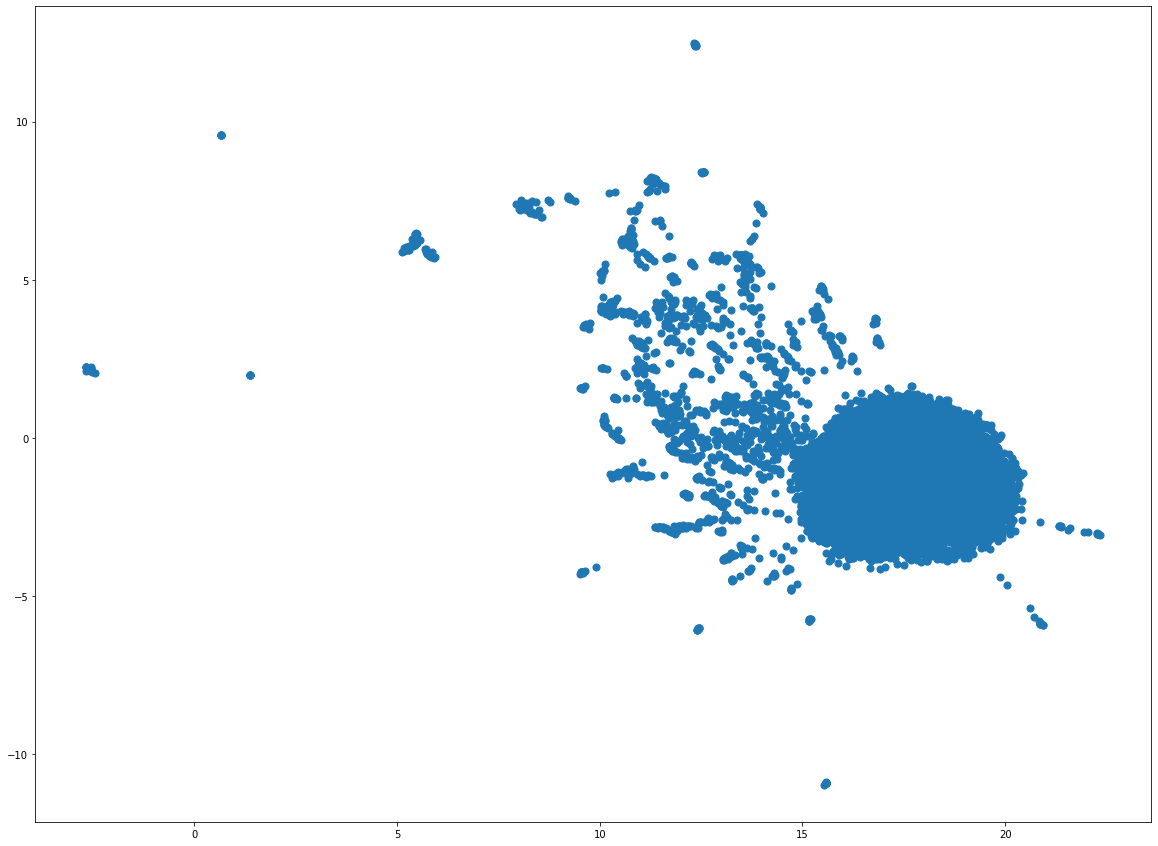

(10660, 2)

In [3]:
#차원 축소(UMAP)

plt.figure(figsize=(20,15))
model = UMAP(n_neighbors=10, min_dist= 0.25, n_components= 2, verbose= True)
umap = model.fit_transform(vector)
plt.scatter(umap[:,0], umap[:,1], cmap = 'tab10', s=50)
plt.show()


vector = umap
vector.shape

DBSCAN

In [4]:

#DBSCAN
model = DBSCAN(eps=0.5, min_samples=4)

vector = pd.DataFrame(vector)

result = model.fit(vector)

result_id = pd.DataFrame(result.labels_)


시각화

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


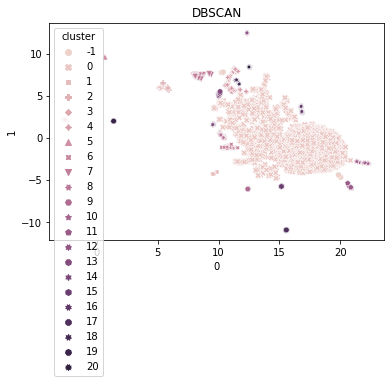

In [5]:
d2 = pd.DataFrame()
d2 = pd.concat([vector, result_id], axis=1)
d2.columns = [0,1,"cluster"]



#시각화
sns.scatterplot(d2[0], d2[1], hue=d2['cluster'], style=d2['cluster'], legend="full")
plt.title('DBSCAN')
plt.show()


plt.clf()
plt.close()

결과 평가 지표

In [6]:
print('Silhouette Coefficient: {:.4f}'.format(silhouette_score(d2.iloc[:,:-1], d2['cluster'])))
print('Davies Bouldin Index: {:.4f}'.format(davies_bouldin_score(d2.iloc[:,:-1], d2['cluster'])))


Silhouette Coefficient: 0.1611
Davies Bouldin Index: 1.4526


파일 저장

In [7]:
df['result'] = result_id

result_id = np.array(result_id).flatten().tolist()


f = open('C:/Users/User/OneDrive - 공주대학교/바탕 화면/review/result_dbscan_ver3.txt',mode='w', encoding='utf-8' )

for cluster_num in set(result_id):
    f.write("cluster num : {} \n".format(cluster_num))
    temp_df = df[df['result'] == cluster_num]
    for review in temp_df['리뷰']:
        f.write("{}".format(review))
        f.write('\n')

f.close

<function TextIOWrapper.close()>